In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

import os
from dotenv import load_dotenv
load_dotenv('.env')
import google.generativeai as genai
import seaborn as sns

import torch
from transformers import pipeline

c:\Users\Dani\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")

In [4]:
URL_BASE = "https://dadosabertos.camara.leg.br/api/v2"

In [5]:
def fetch_api_data(endpoint, **params):
    response = requests.get(f"{URL_BASE}/{endpoint}", params=params)
    if response.status_code == 200:
        return response.json()["dados"]
    else:
        print(f"Erro ao acessar {endpoint}: {response.status_code}, Detalhes: {response.text}")
        return None

def save_deputies():
    if not os.path.exists('data'):
        os.makedirs('data')
    deputados_data = fetch_api_data('deputados')
    if deputados_data:
        df_deputados = pd.DataFrame(deputados_data)
        df_deputados.to_parquet("data/deputados.parquet", index=False)
        print("Dados dos deputados salvos em data/deputados.parquet")

save_deputies()


Dados dos deputados salvos em data/deputados.parquet


In [6]:
prompt1 = """
O arquivo deputados.parquet contém dados dos deputados federais. Você é um especialista em ciência de dados e irá implementar um código Python que cria
um gráfico de pizza (pie chart) com os totais e percentuais de cada deputado por partido. Utilize as bibliotecas Pandas e Matplotlib

A coluna siglaPartido no arquivo possui a informação de cada partido.
Por fim, salve o gráfico em uma imagem de arquivo .png no diretório "docs/distribuicao_deputados.png (crie a pasta docs caso ela não exista)
Não retorne em hipótese alguma textos adicionais. Retorne apenas o código Python.
"""

In [7]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt1)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import os

# Cria o diretório docs se ele não existir
if not os.path.exists("docs"):
    os.makedirs("docs")

# Lê o arquivo parquet
df = pd.read_parquet("deputados.parquet")

# Conta a ocorrência de cada partido
partidos = df['siglaPartido'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Garante que o gráfico seja um círculo

# Salva o gráfico em um arquivo png
plt.savefig('docs/distribuicao_deputados.png')

```



In [8]:
df = pd.read_parquet("./data/deputados.parquet")

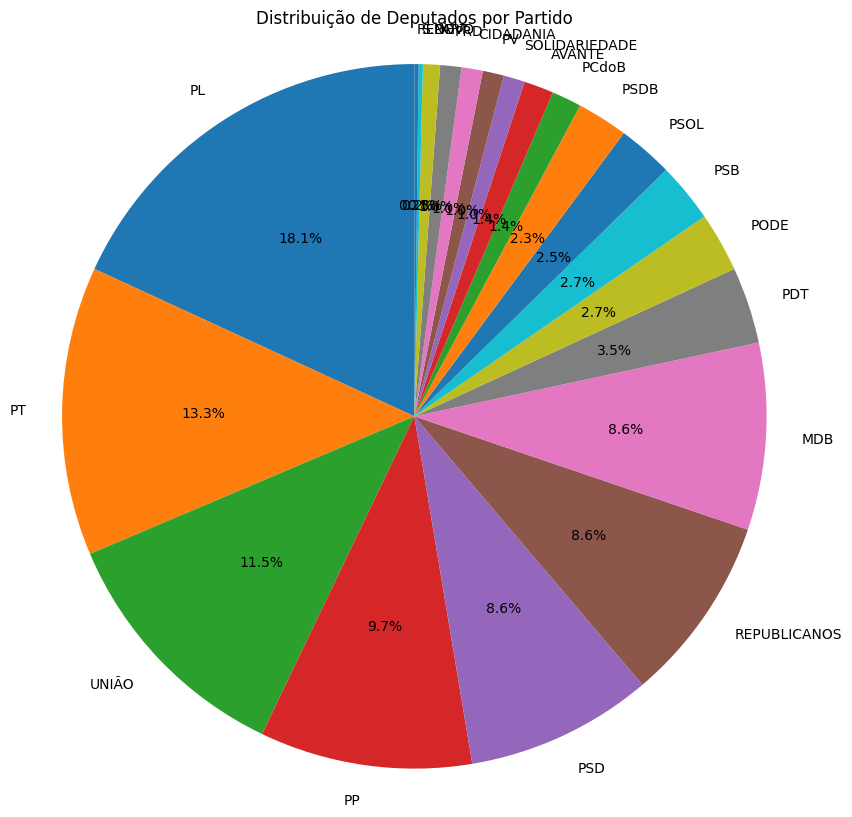

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Cria o diretório docs se ele não existir
if not os.path.exists("docs"):
    os.makedirs("docs")

# Lê o arquivo parquet
df = pd.read_parquet("data/deputados.parquet")

# Conta a ocorrência de cada partido
partidos = df['siglaPartido'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Garante que o gráfico seja um círculo

# Salva o gráfico em um arquivo png
plt.savefig('docs/distribuicao_deputados.png')

In [13]:
dados_deputados = pd.read_parquet("./data/deputados.parquet")

In [14]:
contagem_partidos = dados_deputados['siglaPartido'].value_counts()

In [15]:
contagem_partidos_texto = str(contagem_partidos.to_dict())

In [16]:
prompt_analise = """
Você é um analista político focado na política brasileira, acompanhando de perto as atividades na Câmara dos Deputados.

Baseado na distribuição dos deputados por partido representada na Câmara, avalie como essa configuração pode influenciar as operações e a dinâmica política geral, considerando aspectos de concentração versus dispersão partidária.

Apresente sua análise em um formato JSON com três insights (insight1, insight2, insight3).
"""

In [17]:
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
modelo = genai.GenerativeModel("gemini-1.5-flash")

# Gerar a análise política a partir do prompt
resposta = modelo.generate_content(prompt_analise)
print(resposta.text)

```json
{
  "analysis": {
    "title": "Influência da Distribuição Partidária na Câmara dos Deputados Brasileira na Dinâmica Política",
    "insights": [
      {
        "insight1": {
          "description": "A concentração de poder em poucos partidos com grande número de deputados facilita a formação de blocos majoritários e a aprovação de pautas prioritárias para esses partidos.  Isso pode levar à aprovação rápida de projetos de lei alinhados com a agenda desses partidos, mas também pode resultar em uma menor representatividade de minorias e uma menor capacidade de negociação para partidos menores. A capacidade de barganha de partidos com menor número de deputados fica consideravelmente reduzida, o que pode levar a uma situação de 'toma lá dá cá' mais intensa,  com concessões sendo feitas para obter apoio em votações importantes.",
          "implications": ["Governabilidade facilitada para partidos maiores, mas risco de marginalização de minorias e aumento do clientelismo.", "Maior

In [18]:
formatted_response= response.text.replace("```json\n",'').replace("\n```",'')
insights = json.loads(formatted_response)

with open("./data/insights_distribuicao_deputados.json", "w") as file:
    json.dump(insights, file, indent=4, ensure_ascii=False)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)